# Importar Librerias

In [61]:
from gurobipy import *
import networkx as nx
import matplotlib.pyplot as plt
import openpyxl 
import pandas as pd
import numpy as np

# Importación de Datos

In [62]:
# Datos globales
nref  = 84         # nodo de referencia
vref  = 1.0        # voltaje en la subestaciÛn (pu)
vbase = 11.40      # Voltaje base (kV)
sbase = 10000      # Potencia base (kVA)
tol   = 10e-8      # Tolerancia de error permitida
vmin  = 0.93       # Voltaje mÌnimo (pu)
vmax  = 1.05       # Voltaje m·ximo (pu)
delV=vmax-vmin

# Base de impedancia
zbase = 1000*((vbase**2)/sbase)

# Datos de ramas
#         desde  hacia       R(ohm)   X(ohm)
ramos = [  [1,      84,       0.1944,   0.6624],
           [1,       2,       0.2096,   0.4304],
           [2,       3,       0.2358,   0.4842],
           [3,       4,       0.0917,   0.1883],
           [4,       5,       0.2096,   0.4304],
           [5,       6,       0.0393,   0.0807],
           [6,       7,       0.0405,   0.1380],
           [7,       8,       0.1048,   0.2152],
           [7,       9,       0.2358,   0.4842],
           [7,      10,       0.1048,   0.2152],
          [11,      84,       0.0786,   0.1614],
          [11,      12,       0.3406,   0.6944],
          [12,      13,       0.0262,   0.0538],
          [12,      14,       0.0786,   0.1614],
          [15,      84,       0.1134,   0.3864],
          [15,      16,       0.0524,   0.1076],
          [16,      17,       0.0524,   0.1076],
          [17,      18,       0.1572,   0.3228],
          [18,      19,       0.0393,   0.0807],
          [19,      20,       0.1703,   0.3497],
          [20,      21,       0.2358,   0.4842],
          [21,      22,       0.1572,   0.3228],
          [21,      23,       0.1965,   0.4035],
          [23,      24,       0.1310,   0.2690],
          [25,      84,       0.0567,   0.1932],
          [25,      26,       0.1048,   0.2152],
          [26,      27,       0.2489,   0.5111],
          [27,      28,       0.0486,   0.1656],
          [28,      29,       0.1310,   0.2690],
          [30,      84,       0.1965,   0.3960],
          [30,      31,       0.1310,   0.2690],
          [31,      32,       0.1310,   0.2690],
          [32,      33,       0.0262,   0.0538],
          [33,      34,       0.1703,   0.3497],
          [34,      35,       0.0524,   0.1076],
          [35,      36,       0.4978,   1.0222],
          [36,      37,       0.0393,   0.0807],
          [37,      38,       0.0393,   0.0807],
          [38,      39,       0.0786,   0.1614],
          [39,      40,       0.2096,   0.4304],
          [38,      41,       0.1965,   0.4035],
          [41,      42,       0.2096,   0.4304],
          [43,      84,       0.0486,   0.1656],
          [43,      44,       0.0393,   0.0807],
          [44,      45,       0.1310,   0.2690],
          [45,      46,       0.2358,   0.4842],
          [47,      84,       0.2430,   0.8280],
          [47,      48,       0.0655,   0.1345],
          [48,      49,       0.0655,   0.1345],
          [49,      50,       0.0393,   0.0807],
          [50,      51,       0.0786,   0.1614],
          [51,      52,       0.0393,   0.0807],
          [52,      53,       0.0786,   0.1614],
          [53,      54,       0.0524,   0.1076],
          [54,      55,       0.1310,   0.2690],
          [56,      84,       0.2268,   0.7728],
          [56,      57,       0.5371,   1.1029],
          [57,      58,       0.0524,   0.1076],
          [58,      59,       0.0405,   0.1380],
          [59,      60,       0.0393,   0.0807],
          [60,      61,       0.0262,   0.0538],
          [61,      62,       0.1048,   0.2152],
          [62,      63,       0.2358,   0.4842],
          [63,      64,       0.0243,   0.0828],
          [65,      84,       0.0486,   0.1656],
          [65,      66,       0.1703,   0.3497],
          [66,      67,       0.1215,   0.4140],
          [67,      68,       0.2187,   0.7452],
          [68,      69,       0.0486,   0.1656],
          [69,      70,       0.0729,   0.2484],
          [70,      71,       0.0567,   0.1932],
          [71,      72,       0.0262,   0.0528],
          [73,      84,       0.3240,   1.1040],
          [73,      74,       0.0324,   0.1104],
          [74,      75,       0.0567,   0.1932],
          [75,      76,       0.0486,   0.1656],
          [77,      84,       0.2511,   0.8556],
          [77,      78,       0.1296,   0.4416],
          [78,      79,       0.0486,   0.1656],
          [79,      80,       0.1310,   0.2640],
          [80,      81,       0.1310,   0.2640],
          [81,      82,       0.0917,   0.1883],
          [82,      83,       0.3144,   0.6456],
           [5,      55,       0.1310,   0.2690],
           [7,      60,       0.1310,   0.2690],
          [11,      43,       0.1310,   0.2690],
          [12,      72,       0.3406,   0.6994],
          [13,      76,       0.4585,   0.9415],
          [14,      18,       0.5371,   1.0824],
          [16,      26,       0.0917,   0.1883],
          [20,      83,       0.0786,   0.1614],
          [28,      32,       0.0524,   0.1076],
          [29,      39,       0.0786,   0.1614],
          [34,      46,       0.0262,   0.0538],
          [40,      42,       0.1965,   0.4035],
          [53,      64,       0.0393,   0.0807] ]

# Demanda de potencia activa y reactiva en las barras
#             barra          Pd(kW)   Qd(kW) Qbc(kW)
barras = [
    [1, 0.0, 0.0, 0.0],
    [2, 100.0, 50.0, 0.0],
    [3, 300.0, 200.0, 0.0],
    [4, 350.0, 250.0, 0.0],
    [5, 220.0, 100.0, 0.0],
    [6, 1100.0, 800.0, 0.0],
    [7, 400.0, 320.0, 0.0],
    [8, 300.0, 200.0, 0.0],
    [9, 300.0, 230.0, 0.0],
    [10, 300.0, 260.0, 0.0],
    [11, 0.9, 0.0, 0.0],
    [12, 1200.0, 800.0, 0.0],
    [13, 800.0, 600.0, 0.0],
    [14, 700.0, 500.0, 0.0],
    [15, 0.0, 0.0, 0.0],
    [16, 300.0, 150.0, 0.0],
    [17, 500.0, 350.0, 0.0],
    [18, 700.0, 400.0, 0.0],
    [19, 1200.0, 1000.0, 0.0],
    [20, 300.0, 300.0, 0.0],
    [21, 400.0, 350.0, 0.0],
    [22, 50.0, 20.0, 0.0],
    [23, 50.0, 20.0, 0.0],
    [24, 50.0, 10.0, 0.0],
    [25, 50.0, 30.0, 0.0],
    [26, 100.0, 60.0, 0.0],
    [27, 100.0, 70.0, 0.0],
    [28, 1800.0, 1300.0, 0.0],
    [29, 200.0, 120.0, 0.0],
    [30, 0.0, 0.0, 0.0],
    [31, 1800.0, 1600.0, 0.0],
    [32, 200.0, 150.0, 0.0],
    [33, 200.0, 100.0, 0.0],
    [34, 800.0, 600.0, 0.0],
    [35, 100.0, 60.0, 0.0],
    [36, 100.0, 60.0, 0.0],
    [37, 20.0, 10.0, 0.0],
    [38, 20.0, 10.0, 0.0],
    [39, 20.0, 10.0, 0.0],
    [40, 20.0, 10.0, 0.0],
    [41, 200.0, 160.0, 0.0],
    [42, 50.0, 30.0, 0.0],
    [43, 0.0, 0.0, 0.0],
    [44, 30.0, 20.0, 0.0],
    [45, 800.0, 700.0, 0.0],
    [46, 200.0, 150.0, 0.0],
    [47, 0.0, 0.0, 0.0],
    [48, 0.0, 0.0, 0.0],
    [49, 0.0, 0.0, 0.0],
    [50, 200.0, 160.0, 0.0],
    [51, 800.0, 600.0, 0.0],
    [52, 500.0, 300.0, 0.0],
    [53, 500.0, 350.0, 0.0],
    [54, 500.0, 300.0, 0.0],
    [55, 200.0, 80.0, 0.0],
    [56, 0.0, 0.0, 0.0],
    [57, 30.0, 20.0, 0.0],
    [58, 600.0, 420.0, 0.0],
    [59, 0.0, 0.0, 0.0],
    [60, 20.0, 10.0, 0.0],
    [61, 20.0, 10.0, 0.0],
    [62, 200.0, 130.0, 0.0],
    [63, 300.0, 240.0, 0.0],
    [64, 300.0, 200.0, 0.0],
    [65, 0.0, 0.0, 0.0],
    [66, 50.0, 30.0, 0.0],
    [67, 0.0, 0.0, 0.0],
    [68, 400.0, 360.0, 0.0],
    [69, 0.0, 0.0, 0.0],
    [70, 0.0, 0.0, 0.0],
    [71, 2000.0, 1500.0, 0.0],
    [72, 200.0, 150.0, 0.0],
    [73, 0.0, 0.0, 0.0],
    [74, 0.0, 0.0, 0.0],
    [75, 1200.0, 950.0, 0.0],
    [76, 300.0, 180.0, 0.0],
    [77, 0.0, 0.0, 0.0],
    [78, 400.0, 360.0, 0.0],
    [79, 2000.0, 1300.0, 0.0],
    [80, 200.0, 140.0, 0.0],
    [81, 500.0, 360.0, 0.0],
    [82, 100.0, 30.0, 0.0],
    [83, 400.0, 360.0, 0.0],
    [84, 0.0, 0.0, 0.0]
]


# Conjuntos y Parámetros

In [63]:
# Nodos
N = list(range(1,len(barras)+1))

# Arcos
B = [(ramos[i][0],ramos[i][1]) for i in range(len(ramos))]+[(ramos[i][1],ramos[i][0]) for i in range(len(ramos))]


D=[nref]

# =============================
# PARAMETROS
# =============================

r={}
x={}
for i in ramos:
    r[(i[0],i[1])]=i[2]/zbase
    r[(i[1],i[0])]=i[2]/zbase
    x[(i[0],i[1])]=i[3]/zbase
    x[(i[1],i[0])]=i[3]/zbase
    
pd={}
qd={}
for i in barras:
    pd[i[0]]=i[1]/sbase
    qd[i[0]]=i[2]/sbase

        
bv=0.1

# Grafo

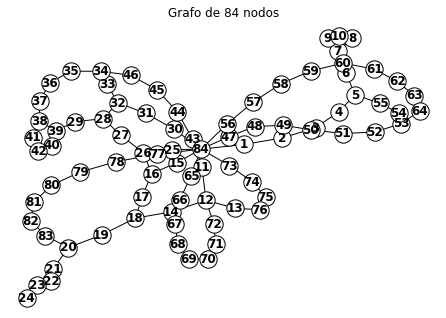

In [74]:
grafo=[]

G = nx.Graph()

G.add_nodes_from(N)

G.add_edges_from(B)
nx.draw(G, with_labels=True, node_color="white", font_weight='bold', edgecolors='black')
plt.title("Grafo de 84 nodos")
plt.show()

# Creación del Modelo y Variables

In [64]:
m=Model('RDS')
m.setParam('MIPGap', tol)


y={}
delta={}
I={}
p={}
q={}

for b in B:
    y[b]=m.addVar(vtype=GRB.BINARY, name ="y")
    delta[b]=m.addVar(vtype=GRB.CONTINUOUS, name="delta", lb=-delV, ub=delV)
    I[b]=m.addVar(vtype=GRB.CONTINUOUS, name="I", lb=0, ub=1)
    p[b]=m.addVar(vtype=GRB.CONTINUOUS, lb= 0, ub=1, name = "p")
    q[b]=m.addVar(vtype=GRB.CONTINUOUS, lb= 0, ub=1,name = "q")
    
v={}

for n in N:
    v[n]=m.addVar(vtype=GRB.CONTINUOUS, name="v", lb=vmin**2, ub=vmax**2)


Set parameter MIPGap to value 1e-07


# Modelo Matemático 

## Función Objetivo

$$
Min \sum\limits_{ij \in {B}} {{R_{ij}}I_{ij}^{sqr}};
$$


In [65]:
FO = quicksum(r[b]*I[b] for b in B)
m.setObjective(FO,GRB.MINIMIZE)

## Restricciones

$$
\sum\limits_{ki \in {B}} {{P_{ki}}}   - \sum\limits_{ij \in {B}} {\left( {{P_{ij}} + {R_{ij}}I_{ij}^{2}} \right)} + P_{i,t}^S = P_{i,t}^D \forall i \in {N}
$$ 
$$
\sum\limits_{ki \in {B}} {{Q_{ki,t}}}   - \sum\limits_{ij \in {B}} {\left( {{Q_{ij}} + {X_{ij}}I_{ij}^{sqr}} \right)}  + Q_{i}^S= Q_{i}^D \forall i \in {N}
$$


$$
{V_{i}^{sqr} = V_{j}^{sqr} + 2\left( {{R_{ij}}{P_{ij}} + {X_{ij}}{Q_{ij,t}}} \right)}- \left( {{X_{ij}}^2 + {R_{ij}}^2} \right){I_{ij}^{sqr}} + \Delta_{ij}^{V} \forall ij \in {B}
$$

$$
- {b^V}( {1 - {y_{ij}^B}}) \le \Delta _{ij}^V \le {b^V}( {1 -  {y_{ij}^B}}) \forall ij \in B
$$

$$
V_{j}^{sqr} I_{ij}^{sqr} = P_{ij}^2 +  Q_{ij}^2 \forall ij \in {B}
$$

$$
{ {\underline V }^2} \le V_{i}^{sqr} \le {\overline V }^2 \forall i \in N
$$

$$
0 \le I_{ij}^{sqr} \le I_{ij}^2 y_{ij}^B \forall ij \in {B}
$$

$$
y_{ij} + y_{ji} \le 1 \forall ij \in {B}
$$

$$\sum_{ij \in B}{ y_{ij}} = |N|- 1
$$


In [66]:
#1
for n in N:
    if n==nref:
        m.addConstr(quicksum(p[(j,i)]for (j,i)in B if i==n)-
            quicksum(p[(i,j)]+r[(i,j)]*(I[(i,j)]) for (i,j)in B if i==n) <= pd[n])
    else:
        m.addConstr(quicksum(p[(j,i)]for (j,i)in B if i==n)-
            quicksum(p[(i,j)]+r[(i,j)]*(I[(i,j)]) for (i,j)in B if i==n) == pd[n])

#2
for n in N:
    if n==nref:
        m.addConstr(quicksum(q[(j,i)]for (j,i)in B if i==n)-
             quicksum(q[(i,j)]+x[(i,j)]*(I[(i,j)]) for (i,j)in B if i==n) <= qd[n])
    else:
        m.addConstr(quicksum(q[(j,i)]for (j,i)in B if i==n)-
             quicksum(q[(i,j)]+x[(i,j)]*(I[(i,j)]) for (i,j)in B if i==n) == qd[n])

#3 x
for (i,j) in B:
    m.addConstr((v[i])-2*(r[i,j]*p[(i,j)]+x[(i,j)]*q[(i,j)])+
                (x[(i,j)]**2+r[(i,j)]**2)*(I[(i,j)])-
                delta[(i,j)]-(v[j])==0)

#4 
for b in B: #5-6
    m.addConstr(-bv*(1-y[b])<=delta[b])
    m.addConstr(delta[b]<=bv*(1-y[b]))

#5
for (i,j) in B:
    m.addConstr(v[j]*I[(i,j)]>=p[(i,j)]*p[(i,j)]+q[(i,j)]*q[(i,j)])

#6 
for i in N:
    m.addConstr(vmin**2<=v[i])#
    m.addConstr(v[i]<=vmax**2)#

#7
for b in B:
    m.addConstr(0<=I[b])
    m.addConstr(I[b]<=y[b]*(vmax/r[b])**2)
    
#8 solo hay flujo en una direccion
for (i, j) in B:
    m.addConstr(y[(i,j)]+y[(j,i)]<=1, name=f"solo_una_una_direccion_de_flujo_entre_los_nodos_{i}_{j}")

#9 Radialidad
m.addConstr(quicksum(y[i,j] for i,j in B) == len(N) - 1 ,name=f"radialidad")
for i in N: 
    suma=0
    if (i!=nref):
        for j in N: 
           if (i,j) in B: 
                suma+=y[j,i]
        m.addConstr(suma >=1, name=f"conexion{i}")
    else:
        for j in N: 
           if (i,j) in B: 
                suma+=y[i,j]
        m.addConstr(suma >=1, name=f"conexion{i}")

#9 Conexidad
for i in N: 
    m.addConstr(quicksum(y[a,j] for (a,j) in B if a==i)+quicksum(y[j,a] for (j,a) in B if a==i)>=1, f"conexo_{i}")

m.update()
m.setParam("NonConvex",2)

Set parameter NonConvex to value 2


# Correr el Modelo y Graficar

In [75]:
m.optimize()
m.write("modelo84.lp")
m.status

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-5250U CPU @ 1.60GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1657 rows, 1044 columns and 4968 nonzeros
Model fingerprint: 0x467d965e
Model has 192 quadratic constraints
Variable types: 852 continuous, 192 integer (192 binary)
Coefficient statistics:
  Matrix range     [2e-05, 3e+05]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [2e-03, 4e-02]
  Bounds range     [1e-01, 1e+00]
  RHS range        [9e-05, 8e+01]
Presolved: 1061 rows, 1002 columns, 3836 nonzeros
Presolved model has 185 quadratic constraint(s)

Continuing optimization...


Cutting planes:
  Implied bound: 31
  MIR: 9
  Flow cover: 7
  Relax-and-lift: 10

Explored 59 nodes (7071 simplex iterations) in 0.11 seconds (0.00 work units)
Thread count was 4 (of 4 available processors)

Solution count 4: 0.0422894 0.0423215 0.0423579 0.0425461 

Optimal solution found (tolera

2

Tiempo Corrida:  0.1389908790588379
Costo: 422.8941081062073
y[1,84]: 0.0
y[1,2]: 1.0
y[2,3]: 1.0
y[3,4]: 1.0
y[4,5]: 1.0
y[5,6]: 1.0
y[6,7]: 0.0
y[7,8]: 1.0
y[7,9]: 1.0
y[7,10]: 1.0
y[11,84]: 0.0
y[11,12]: 1.0
y[12,13]: -0.0
y[12,14]: 1.0
y[15,84]: 0.0
y[15,16]: 1.0
y[16,17]: 1.0
y[17,18]: 1.0
y[18,19]: 1.0
y[19,20]: 1.0
y[20,21]: 1.0
y[21,22]: 1.0
y[21,23]: 1.0
y[23,24]: 1.0
y[25,84]: 0.0
y[25,26]: 1.0
y[26,27]: 1.0
y[27,28]: 1.0
y[28,29]: 1.0
y[30,84]: 0.0
y[30,31]: 1.0
y[31,32]: 1.0
y[32,33]: 0.9999999999999993
y[33,34]: 0.0
y[34,35]: 1.0
y[35,36]: 1.0
y[36,37]: 1.0
y[37,38]: 1.0
y[38,39]: -0.0
y[39,40]: 1.0
y[38,41]: 1.0
y[41,42]: 0.0
y[43,84]: 0.0
y[43,44]: 1.0
y[44,45]: 1.0
y[45,46]: 1.0
y[47,84]: 0.0
y[47,48]: 1.0
y[48,49]: 1.0
y[49,50]: 1.0
y[50,51]: 1.0
y[51,52]: 1.0
y[52,53]: 1.0
y[53,54]: 1.0000000000000002
y[54,55]: -0.0
y[56,84]: 0.0
y[56,57]: 1.0
y[57,58]: 1.0
y[58,59]: 1.0
y[59,60]: 1.0
y[60,61]: 1.0
y[61,62]: -0.0
y[62,63]: 0.0
y[63,64]: 0.0
y[65,84]: 0.0
y[65,66]: 1.0

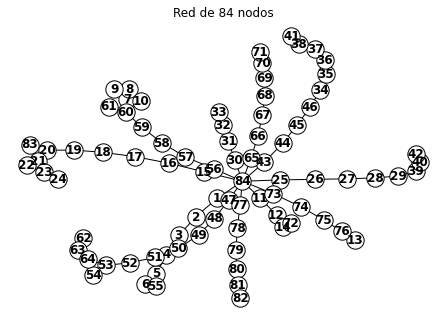

1 - 2, 2 - 3, 3 - 4, 4 - 5, 5 - 6, 7 - 8, 7 - 9, 7 - 10, 11 - 12, 12 - 14, 15 - 16, 16 - 17, 17 - 18, 18 - 19, 19 - 20, 20 - 21, 21 - 22, 21 - 23, 23 - 24, 25 - 26, 26 - 27, 27 - 28, 28 - 29, 30 - 31, 31 - 32, 32 - 33, 34 - 35, 35 - 36, 36 - 37, 37 - 38, 39 - 40, 38 - 41, 43 - 44, 44 - 45, 45 - 46, 47 - 48, 48 - 49, 49 - 50, 50 - 51, 51 - 52, 52 - 53, 53 - 54, 56 - 57, 57 - 58, 58 - 59, 59 - 60, 60 - 61, 65 - 66, 66 - 67, 67 - 68, 68 - 69, 69 - 70, 70 - 71, 73 - 74, 74 - 75, 75 - 76, 77 - 78, 78 - 79, 79 - 80, 80 - 81, 81 - 82, 5 - 55, 12 - 72, 20 - 83, 29 - 39, 40 - 42, 53 - 64, 84 - 1, 84 - 11, 84 - 15, 84 - 25, 84 - 30, 84 - 43, 84 - 47, 84 - 56, 63 - 62, 64 - 63, 84 - 65, 84 - 73, 84 - 77, 60 - 7, 76 - 13, 46 - 34, 


In [77]:
if m.status == GRB.OPTIMAL:
    print('Tiempo Corrida: ', m.RunTime)
    # Visulizar el valor de la función objetivo
    print('Costo:', m.objVal*sbase)
    
    red=[]
    grafo=[]
    estilo=[]
    for (i, j) in B:
            print(f"y[{i},{j}]: {y[i, j].X}")
            if y[(i,j)].X>=0.5:
                red.append((i,j))
                estilo.append('solid')
            elif B.index((i,j)) <len(B)/2: 
                estilo.append('dashed')

    
    G1 = nx.Graph()    
    G1.add_nodes_from(N)
    
    G1.add_edges_from(red)
    nx.draw(G1, with_labels=True, node_color="white", font_weight='bold', edgecolors='black')
    plt.title("Red de 84 nodos")
    plt.show()
    
    p=""
    for i,j in red:
        p+=str(i)+" - "+str(j)+ ", "
    print(p)
else:
    m.computeIIS()
    m.write("modelo84.ilp")

# Tunear

In [8]:
m.tune()
for i in range(m.tuneResultCount):
    m.getTuneResult(i)
m.optimize()
print(m.RunTime)


Solving model using baseline parameter set with TimeLimit=3600s

Testing candidate parameter set 1...

	MIPGap 1e-08
	NonConvex 2

Solving with random seed #1 ...
Optimize a model with 1573 rows, 1044 columns and 4584 nonzeros
Model fingerprint: 0xbce47fa7
Model has 192 quadratic constraints
Variable types: 852 continuous, 192 integer (192 binary)
Coefficient statistics:
  Matrix range     [2e-05, 3e+05]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [2e-03, 4e-02]
  Bounds range     [1e-01, 1e+00]
  RHS range        [9e-05, 8e+01]
Presolve removed 512 rows and 42 columns
Presolve time: 0.08s
Presolved: 1061 rows, 1002 columns, 3836 nonzeros
Presolved model has 185 quadratic constraint(s)
Variable types: 824 continuous, 178 integer (178 binary)

Root relaxation: objective 1.229909e-04, 386 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Tim

# Mejoras en el modelo 

1) Se unificaron las variables I y I^2 con lo que se reduce la cantidad de arcos y se logra una mejora en el tiempo computacional 

2) Se elimina la restricción de que los nodos de referencia no generan ya que con el enfoque utilizado no es necesaria. Con el fin de evitar ciclos en la solución final se añade una nueva restricción.

3) Mediante la optimización de parámetros (tuning) en nuestro modelo computacional, hemos alcanzado una notable mejora en el tiempo de ejecución. Pasamos de 0.17 segundos a tan solo 0.049 segundos, marcando una reducción significativa y eficaz en el tiempo computacional. Este logro destaca la eficiencia de ajustar cuidadosamente los parámetros del modelo, permitiéndonos alcanzar resultados óptimos de manera más rápida y efectiva.